## Solar energy prediction (linear regression)

In [114]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

In [115]:
data=pd.read_csv('/Users/rohit/Downloads/Solar Power Plant Data.csv')

In [116]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import accuracy_score, mean_squared_error

In [117]:
data.head()

Date-Hour(NMT)  WindSpeed  Sunshine  AirPressure  Radiation  \
0  01.01.2017-00:00        0.6         0       1003.8       -7.4   
1  01.01.2017-01:00        1.7         0       1003.5       -7.4   
2  01.01.2017-02:00        0.6         0       1003.4       -6.7   
3  01.01.2017-03:00        2.4         0       1003.3       -7.2   
4  01.01.2017-04:00        4.0         0       1003.1       -6.3   

   AirTemperature  RelativeAirHumidity  SystemProduction  
0             0.1                   97               0.0  
1            -0.2                   98               0.0  
2            -1.2                   99               0.0  
3            -1.3                   99               0.0  
4             3.6                   67               0.0

In [118]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Date-Hour(NMT)       8760 non-null   object 
 1   WindSpeed            8760 non-null   float64
 2   Sunshine             8760 non-null   int64  
 3   AirPressure          8760 non-null   float64
 4   Radiation            8760 non-null   float64
 5   AirTemperature       8760 non-null   float64
 6   RelativeAirHumidity  8760 non-null   int64  
 7   SystemProduction     8760 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 547.6+ KB


### EDA

In [119]:
data.describe().T

count         mean          std    min     25%     50%  \
WindSpeed            8760.0     2.639823     1.628754    0.0     1.4     2.3   
Sunshine             8760.0    11.180479    21.171295    0.0     0.0     0.0   
AirPressure          8760.0  1010.361781    12.793971  965.9  1002.8  1011.0   
Radiation            8760.0    97.538493   182.336029   -9.3    -6.2    -1.4   
AirTemperature       8760.0     6.978893     7.604266  -12.4     0.5     6.4   
RelativeAirHumidity  8760.0    76.719406    19.278996   13.0    64.0    82.0   
SystemProduction     8760.0   684.746071  1487.454665    0.0     0.0     0.0   

                            75%     max  
WindSpeed               3.60000    10.9  
Sunshine                7.00000    60.0  
AirPressure          1018.20000  1047.3  
Radiation             115.60000   899.7  
AirTemperature         13.40000    27.1  
RelativeAirHumidity    93.00000   100.0  
SystemProduction      464.24995  7701.0

In [120]:
data.isnull().sum()

Date-Hour(NMT)         0
WindSpeed              0
Sunshine               0
AirPressure            0
Radiation              0
AirTemperature         0
RelativeAirHumidity    0
SystemProduction       0
dtype: int64

In [121]:
data.dtypes

Date-Hour(NMT)          object
WindSpeed              float64
Sunshine                 int64
AirPressure            float64
Radiation              float64
AirTemperature         float64
RelativeAirHumidity      int64
SystemProduction       float64
dtype: object

In [122]:
data.shape

(8760, 8)

In [123]:
data.rename(columns={"Date-Hour(NMT)":"Date"}, inplace=True)
data.columns

Index(['Date', 'WindSpeed', 'Sunshine', 'AirPressure', 'Radiation',
       'AirTemperature', 'RelativeAirHumidity', 'SystemProduction'],
      dtype='object')

In [124]:
data.columns

Index(['Date', 'WindSpeed', 'Sunshine', 'AirPressure', 'Radiation',
       'AirTemperature', 'RelativeAirHumidity', 'SystemProduction'],
      dtype='object')

In [125]:
data

Date  WindSpeed  Sunshine  AirPressure  Radiation  \
0     01.01.2017-00:00        0.6         0       1003.8       -7.4   
1     01.01.2017-01:00        1.7         0       1003.5       -7.4   
2     01.01.2017-02:00        0.6         0       1003.4       -6.7   
3     01.01.2017-03:00        2.4         0       1003.3       -7.2   
4     01.01.2017-04:00        4.0         0       1003.1       -6.3   
...                ...        ...       ...          ...        ...   
8755  31.12.2017-19:00        4.1         0        988.2       -4.8   
8756  31.12.2017-20:00        2.1         0        987.3       -5.0   
8757  31.12.2017-21:00        1.8         0        986.7       -5.3   
8758  31.12.2017-22:00        2.2         0        986.0       -5.4   
8759  31.12.2017-23:00        2.4         0        985.6       -5.9   

      AirTemperature  RelativeAirHumidity  SystemProduction  
0                0.1                   97               0.0  
1               -0.2                   98               0.0  
2               -1.2                   99               0.0  
3               -1.3                   99               0.0  
4                3.6                   67               0.0  
...              ...                  ...               ...  
8755            -0.7                   94               0.0  
8756            -0.3                   95               0.0  
8757             0.2                   93               0.0  
8758             0.3                   92               0.0  
8759             0.4                   96               0.0  

[8760 rows x 8 columns]

In [126]:
data['Date'] = pd.to_datetime(data['Date'], dayfirst=True)
data.head()

Date  WindSpeed  Sunshine  AirPressure  Radiation  \
0 2017-01-01 00:00:00        0.6         0       1003.8       -7.4   
1 2017-01-01 01:00:00        1.7         0       1003.5       -7.4   
2 2017-01-01 02:00:00        0.6         0       1003.4       -6.7   
3 2017-01-01 03:00:00        2.4         0       1003.3       -7.2   
4 2017-01-01 04:00:00        4.0         0       1003.1       -6.3   

   AirTemperature  RelativeAirHumidity  SystemProduction  
0             0.1                   97               0.0  
1            -0.2                   98               0.0  
2            -1.2                   99               0.0  
3            -1.3                   99               0.0  
4             3.6                   67               0.0

In [127]:
data['year']=data['Date'].dt.year
data['month']=data['Date'].dt.month
data['day']=data['Date'].dt.day
data['hour']=data['Date'].dt.hour

In [128]:
data.tail()

Date  WindSpeed  Sunshine  AirPressure  Radiation  \
8755 2017-12-31 19:00:00        4.1         0        988.2       -4.8   
8756 2017-12-31 20:00:00        2.1         0        987.3       -5.0   
8757 2017-12-31 21:00:00        1.8         0        986.7       -5.3   
8758 2017-12-31 22:00:00        2.2         0        986.0       -5.4   
8759 2017-12-31 23:00:00        2.4         0        985.6       -5.9   

      AirTemperature  RelativeAirHumidity  SystemProduction  year  month  day  \
8755            -0.7                   94               0.0  2017     12   31   
8756            -0.3                   95               0.0  2017     12   31   
8757             0.2                   93               0.0  2017     12   31   
8758             0.3                   92               0.0  2017     12   31   
8759             0.4                   96               0.0  2017     12   31   

      hour  
8755    19  
8756    20  
8757    21  
8758    22  
8759    23

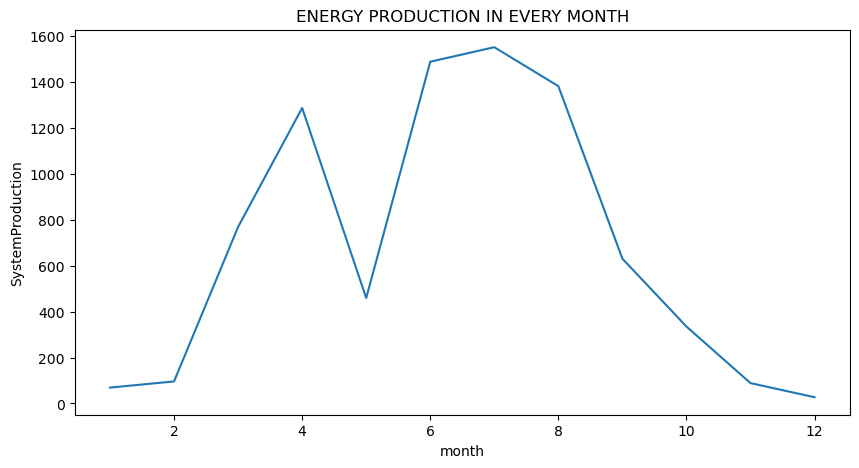

In [129]:
plt.figure(figsize=(10,5))
sns.lineplot(data.groupby(by='month')['SystemProduction'].mean())
plt.title("ENERGY PRODUCTION IN EVERY MONTH")
plt.show()

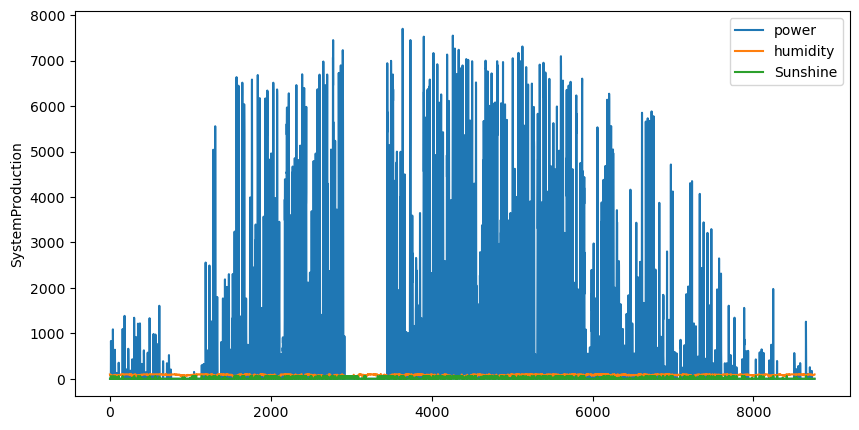

In [130]:
plt.figure(figsize=(10,5))
sns.lineplot(data['SystemProduction'],label='power')
sns.lineplot(data['RelativeAirHumidity'],label="humidity")
sns.lineplot(data['Sunshine'],label='Sunshine')
plt.show()

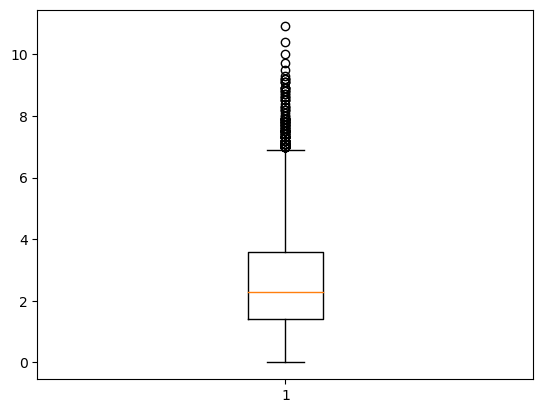

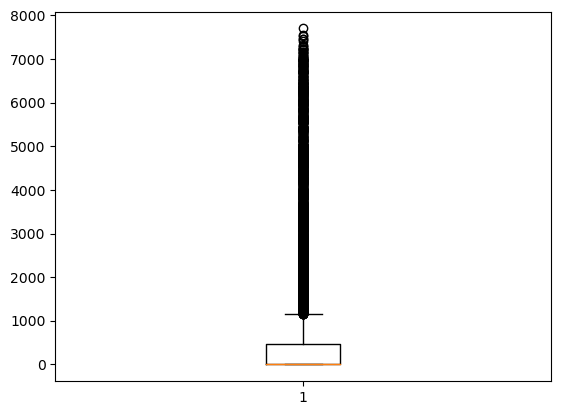

In [131]:
plt.boxplot(data['WindSpeed'])
plt.show()
plt.boxplot(data['SystemProduction'])
plt.show()

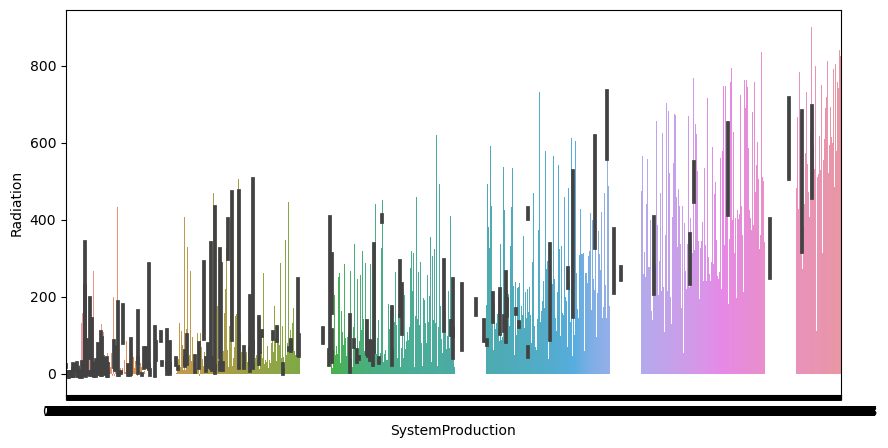

In [132]:
plt.figure(figsize=(10,5))
sns.barplot(x='SystemProduction',y='Radiation',data=data)
plt.show()

In [133]:
corr_data=data.corr()

In [134]:
corr_data.T

Date  WindSpeed  Sunshine  AirPressure  Radiation  \
Date                 1.000000   0.026242 -0.042084    -0.266148  -0.062605   
WindSpeed            0.026242   1.000000  0.123627    -0.028988   0.191142   
Sunshine            -0.042084   0.123627  1.000000     0.064096   0.776288   
AirPressure         -0.266148  -0.028988  0.064096     1.000000   0.054565   
Radiation           -0.062605   0.191142  0.776288     0.054565   1.000000   
AirTemperature       0.163377   0.191490  0.376184    -0.028731   0.535159   
RelativeAirHumidity  0.091790  -0.340053 -0.613761    -0.111853  -0.627944   
SystemProduction    -0.033454   0.195650  0.564228    -0.004487   0.785717   
year                      NaN        NaN       NaN          NaN        NaN   
month                0.996501   0.024084 -0.041036    -0.266855  -0.062664   
day                  0.095131   0.034791 -0.002361    -0.006852   0.017212   
hour                 0.002737   0.083597  0.108017    -0.012969   0.104167   

                     AirTemperature  RelativeAirHumidity  SystemProduction  \
Date                       0.163377             0.091790         -0.033454   
WindSpeed                  0.191490            -0.340053          0.195650   
Sunshine                   0.376184            -0.613761          0.564228   
AirPressure               -0.028731            -0.111853         -0.004487   
Radiation                  0.535159            -0.627944          0.785717   
AirTemperature             1.000000            -0.389777          0.480407   
RelativeAirHumidity       -0.389777             1.000000         -0.545252   
SystemProduction           0.480407            -0.545252          1.000000   
year                            NaN                  NaN               NaN   
month                      0.162839             0.092930         -0.034990   
day                        0.048335            -0.030158          0.029608   
hour                       0.120133            -0.171570          0.160672   

                     year         month           day          hour  
Date                  NaN  9.965005e-01  9.513066e-02  2.737347e-03  
WindSpeed             NaN  2.408371e-02  3.479126e-02  8.359692e-02  
Sunshine              NaN -4.103611e-02 -2.361474e-03  1.080170e-01  
AirPressure           NaN -2.668546e-01 -6.851861e-03 -1.296946e-02  
Radiation             NaN -6.266375e-02  1.721214e-02  1.041667e-01  
AirTemperature        NaN  1.628389e-01  4.833528e-02  1.201327e-01  
RelativeAirHumidity   NaN  9.293024e-02 -3.015758e-02 -1.715701e-01  
SystemProduction      NaN -3.499034e-02  2.960773e-02  1.606716e-01  
year                  NaN           NaN           NaN           NaN  
month                 NaN  1.000000e+00  1.189318e-02  2.590410e-15  
day                   NaN  1.189318e-02  1.000000e+00  1.605400e-16  
hour                  NaN  2.590410e-15  1.605400e-16  1.000000e+00

<AxesSubplot: >

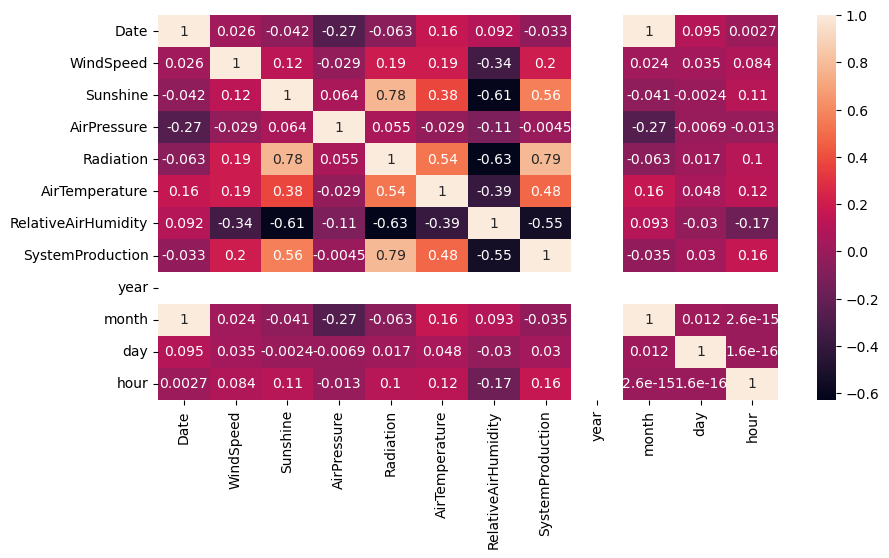

In [135]:
plt.figure(figsize = (10,5))
sns.heatmap(corr_data,annot = True)

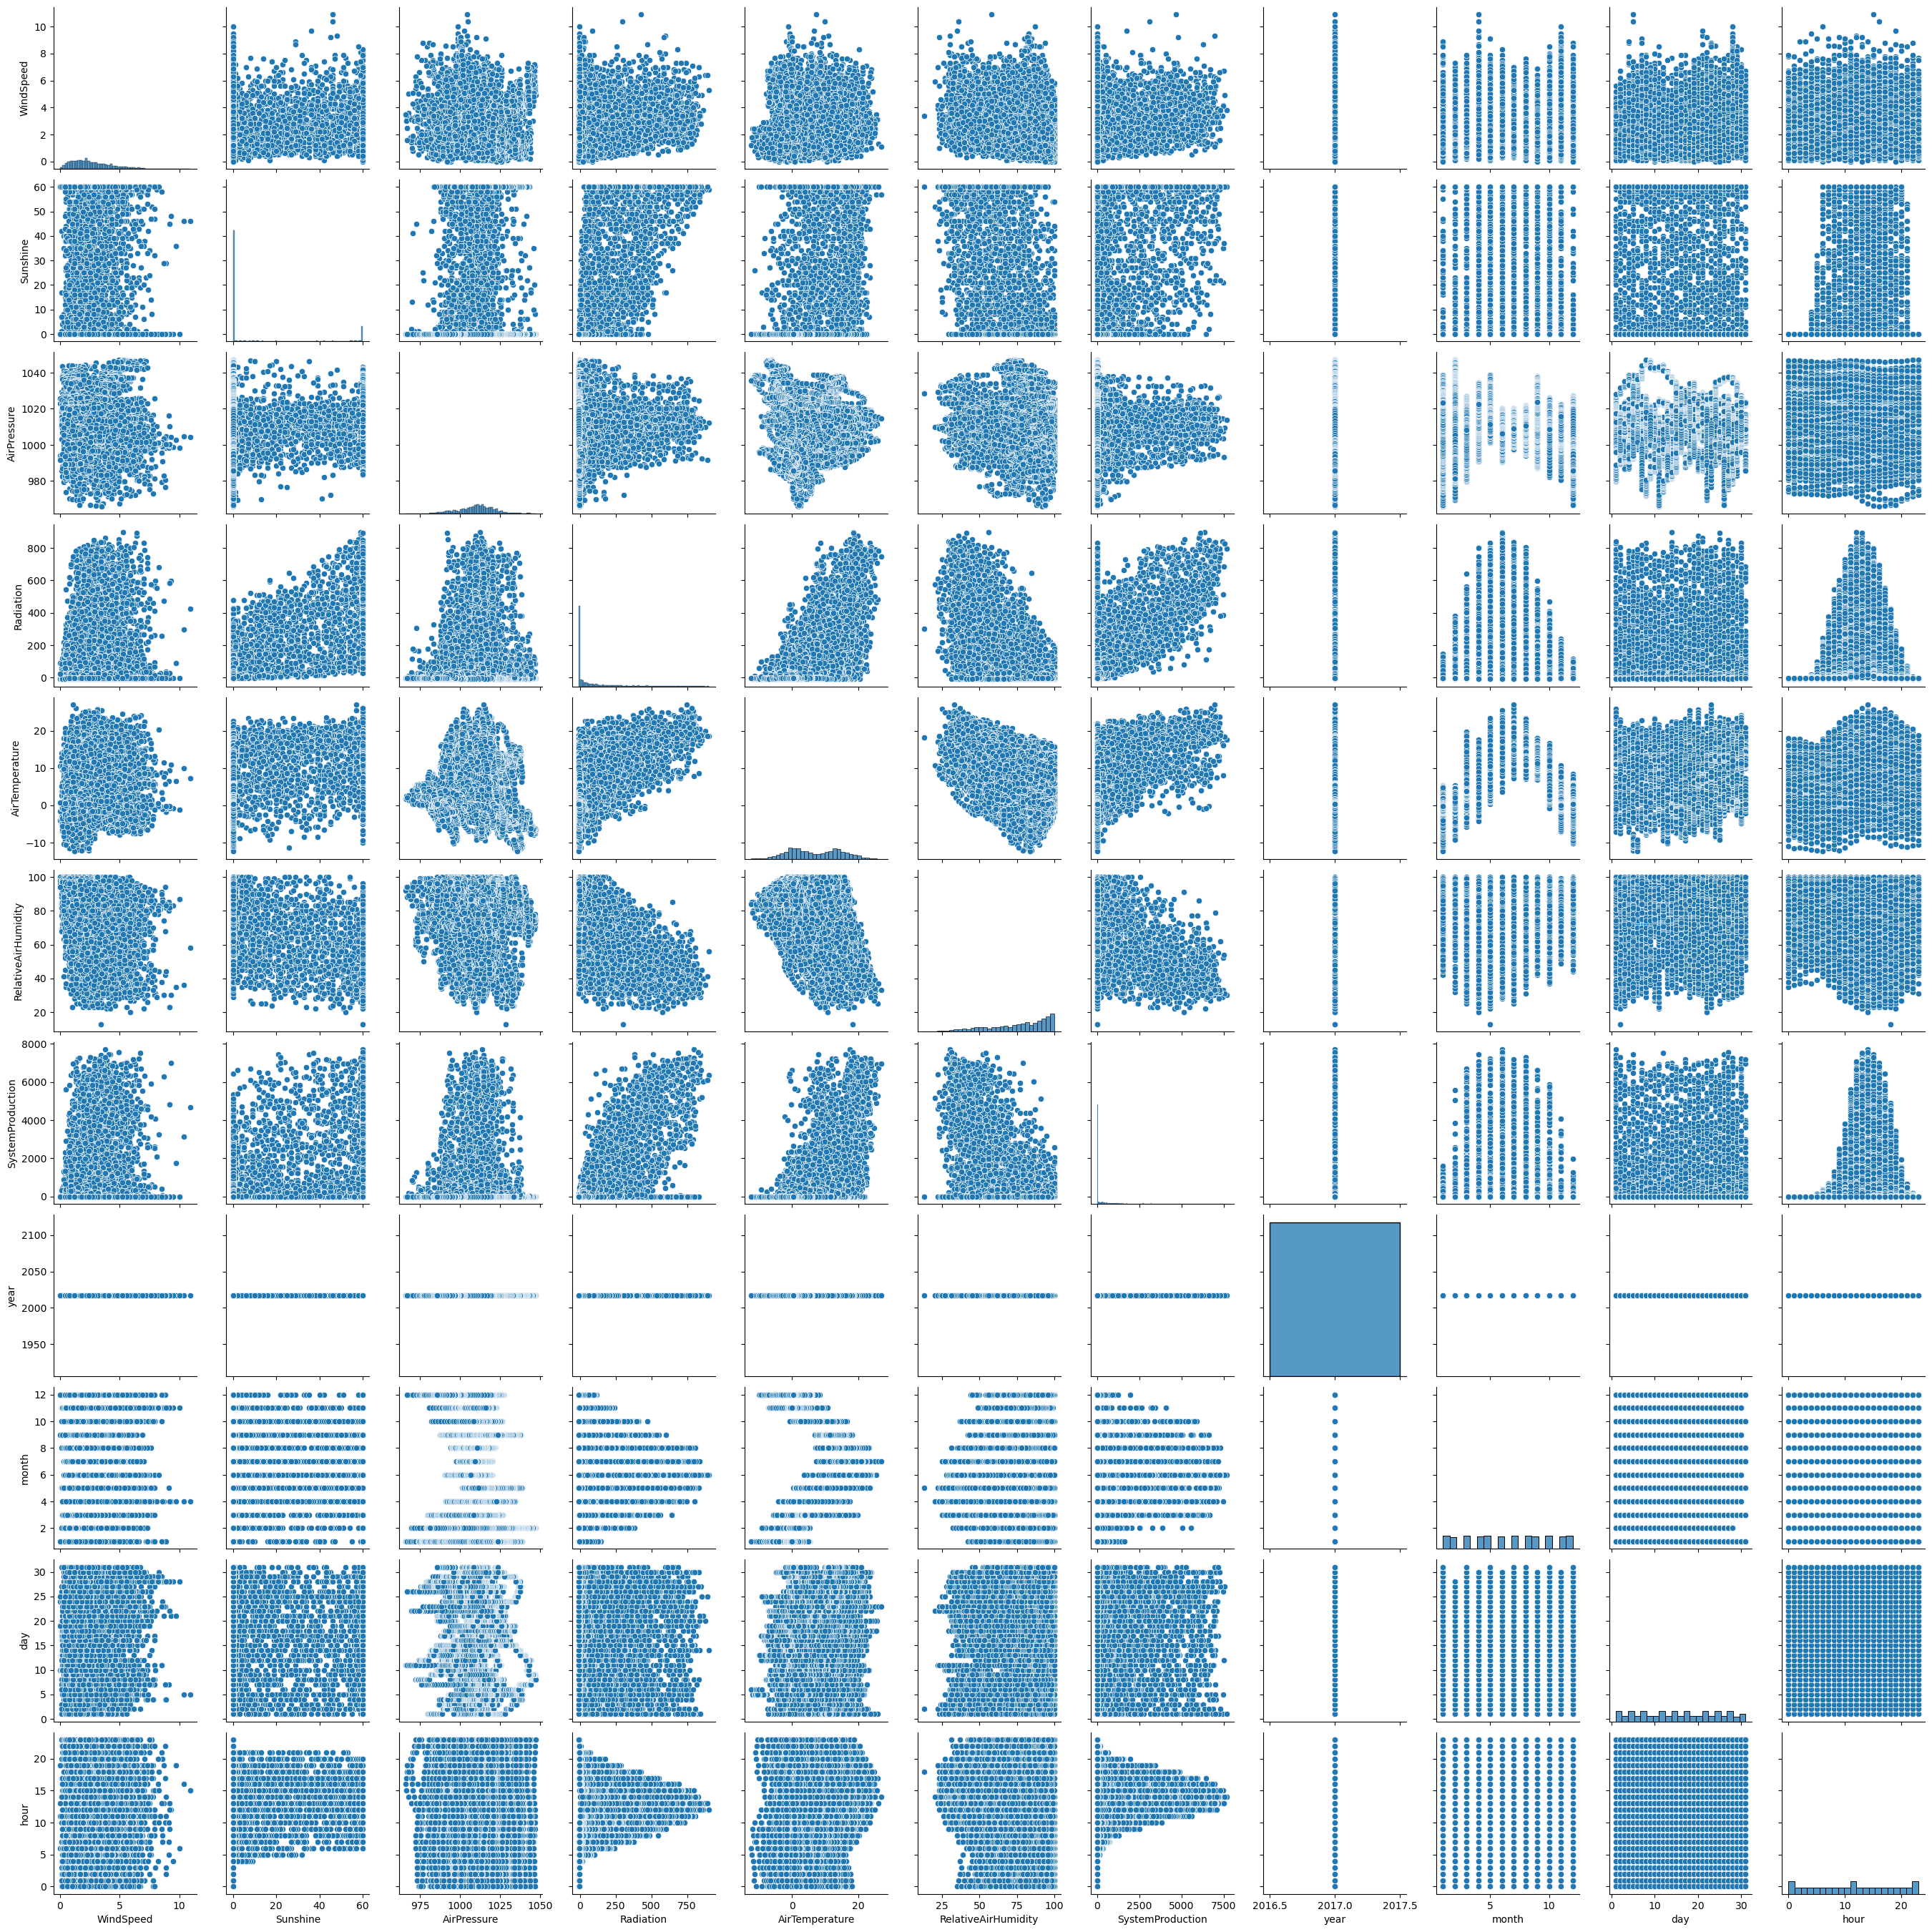

In [136]:
sns.pairplot(data)
plt.show()

In [137]:
x=data.drop(['SystemProduction','Date'],axis=1)
y=data[['SystemProduction']]

In [138]:
 from sklearn.model_selection import train_test_split

In [139]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=50)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(6132, 10)
(2628, 10)
(6132, 1)
(2628, 1)


In [140]:
from sklearn.preprocessing import StandardScaler

In [141]:
SC = StandardScaler()
x_train = pd.DataFrame (SC.fit_transform(x_train),columns=x_train.columns)
x_test = pd.DataFrame(SC.transform(x_test),columns=x_test.columns)

In [142]:
x_test.head()

WindSpeed  Sunshine  AirPressure  Radiation  AirTemperature  \
0   1.971458 -0.529840    -2.115499  -0.559358        0.049478   
1   0.857395 -0.011962    -0.097993   1.925219        1.361638   
2  -1.246948 -0.059042    -0.177111  -0.550557       -0.974007   
3   0.424148  2.200789     0.099802   3.487912        1.742165   
4   1.847673 -0.529840     0.155184  -0.562108       -1.000251   

   RelativeAirHumidity  year     month       day      hour  
0             0.949401   0.0  1.295965  0.838818 -0.511286  
1            -1.548613   0.0 -0.151392  1.524437 -0.222180  
2             0.220813   0.0  1.585436 -1.446580  0.645136  
3            -2.225159   0.0 -0.151392  0.610278  0.500583  
4            -0.872068   0.0 -1.019806 -1.218040  1.078794

In [143]:
from sklearn.linear_model import LinearRegression

In [144]:
LR=LinearRegression()

In [145]:
LR.fit(x_train,y_train)

LinearRegression()

In [146]:
y_pred_LR=LR.predict(x_test)
x_test

WindSpeed  Sunshine  AirPressure  Radiation  AirTemperature  \
0      1.971458 -0.529840    -2.115499  -0.559358        0.049478   
1      0.857395 -0.011962    -0.097993   1.925219        1.361638   
2     -1.246948 -0.059042    -0.177111  -0.550557       -0.974007   
3      0.424148  2.200789     0.099802   3.487912        1.742165   
4      1.847673 -0.529840     0.155184  -0.562108       -1.000251   
...         ...       ...          ...        ...             ...   
2623  -0.318561  2.294948     0.044419   3.161733        1.348517   
2624   0.609825 -0.529840     0.479568  -0.430646       -0.344170   
2625  -0.132884 -0.529840    -0.406553  -0.335487       -0.370414   
2626   1.538211 -0.529840     0.693186  -0.543406       -0.882156   
2627  -1.370732 -0.529840    -2.162970  -0.574759       -0.698454   

      RelativeAirHumidity  year     month       day      hour  
0                0.949401   0.0  1.295965  0.838818 -0.511286  
1               -1.548613   0.0 -0.151392  1.524437 -0.222180  
2                0.220813   0.0  1.585436 -1.446580  0.645136  
3               -2.225159   0.0 -0.151392  0.610278  0.500583  
4               -0.872068   0.0 -1.019806 -1.218040  1.078794  
...                   ...   ...       ...       ...       ...  
2623            -1.600655   0.0  0.138080 -0.189611 -0.222180  
2624             0.168771   0.0 -0.440863 -0.303881 -0.944944  
2625             1.209611   0.0 -0.730335 -1.675120 -0.511286  
2626             0.428981   0.0 -1.309277 -1.218040  0.789689  
2627            -0.611858   0.0  1.585436 -0.760961 -1.089496  

[2628 rows x 10 columns]

In [147]:
y_test

SystemProduction
7832            0.0000
4306         2010.8334
8080            0.0000
4119         1644.5000
1531            0.0000
...                ...
4666         3269.8334
3173            0.0000
2168            0.0000
857             0.0000
8212            0.0000

[2628 rows x 1 columns]

In [148]:
y_pred_LR

array([[ 149.17133344],
       [3343.8979691 ],
       [ -50.58508099],
       ...,
       [ 142.28519692],
       [  59.56688804],
       [ 153.04631693]])

In [149]:
from sklearn.model_selection import cross_val_score

In [150]:
mse=cross_val_score(LR,x_train,y_train,scoring='neg_mean_squared_error',cv=10)

In [151]:
mse

array([-788322.20127094, -771351.853694  , -902233.61583098,
       -762232.67181465, -870994.16327469, -955955.69872108,
       -738243.98325227, -791491.91491548, -830396.33918823,
       -842852.86632867])

In [152]:
np.mean(mse)

-825407.5308290989

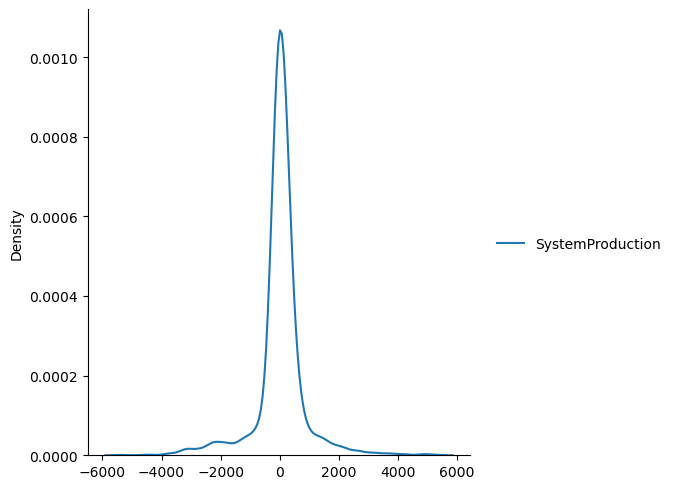

In [153]:
sns.displot(y_pred_LR-y_test,kind='kde')
plt.show()

In [154]:
from sklearn.metrics import mean_squared_error
mse_sk=mean_squared_error(y_pred_LR,y_test)

In [155]:
mse_sk

731184.4088384209

In [156]:
R_square_sk=LR.score(x_test,y_test)
print('the mean squared error(mse) or J(theta) is: ',mse_sk)
print('R square obtain from scikit learn library is : ',R_square_sk)

the mean squared error(mse) or J(theta) is:  731184.4088384209
R square obtain from scikit learn library is :  0.6596129452895116


In [157]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [158]:
# assuming y_true and y_pred are the true and predicted values respectively

# calculate RMSE (rootmean squared error)
rmse=np.sqrt(mean_squared_error(y_test,y_pred_LR))

# calculate MSE (mean squared error)
mse=mean_squared_error(y_test,y_pred_LR)

# calculate MAE(mean absolute error)
mae=mean_absolute_error(y_test,y_pred_LR)

# calculate R2 (coefficent of determination)
r2=r2_score(y_test,y_pred_LR)

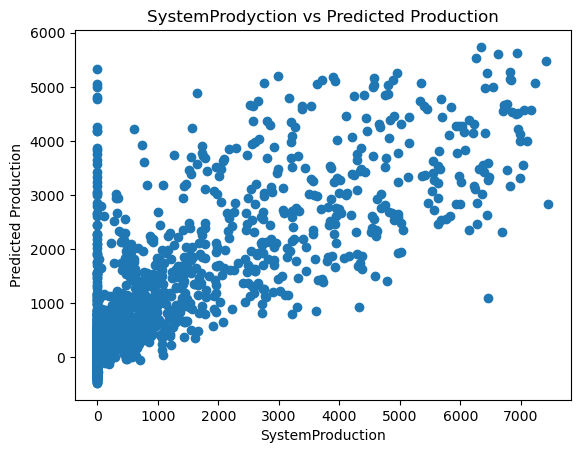

In [159]:
plt.scatter(y_test, y_pred_LR)
plt.xlabel("SystemProduction")
plt.ylabel("Predicted Production")
plt.title("SystemProdyction vs Predicted Production")
plt.show()

/var/folders/_1/354spcvn48z9gsg6l8rcmdy00000gn/T/ipykernel_14464/554712501.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(y_test, hist = False, color = 'b', label = 'Actual Value')
/var/folders/_1/354spcvn48z9gsg6l8rcmdy00000gn/T/ipykernel_14464/554712501.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed

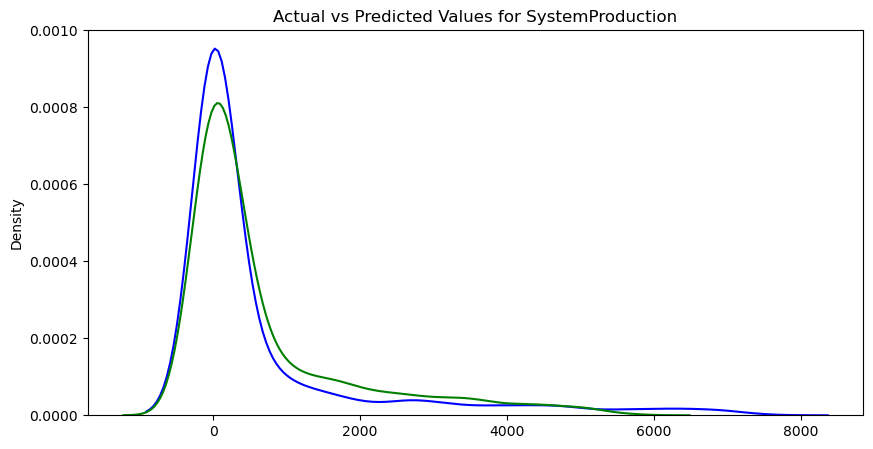

In [160]:
plt.figure(figsize = (10, 5))
ax = sns.distplot(y_test, hist = False, color = 'b', label = 'Actual Value')
sns.distplot(y_pred_LR, hist = False, color = 'g',label = 'Predicted Values',ax = ax)
plt.title('Actual vs Predicted Values for SystemProduction')
plt.show()

In [161]:
rmse

855.0932164614691

In [162]:
mse

731184.4088384209

In [163]:
mae

474.97266682582955

In [164]:
r2

0.6596129452895116

In [165]:
from sklearn import ensemble

In [166]:
from sklearn.ensemble import GradientBoostingRegressor

In [167]:
params = {
    "n_estimators": 500,
    "max_depth": 4,
    "min_samples_split": 5,
    "learning_rate": 0.01,
    "loss": "squared_error",
}

In [168]:
GBR= ensemble.GradientBoostingRegressor(**params)

In [169]:
GBR.fit(x_train,y_train)

/Users/rohit/anaconda3/envs/notebook-/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingRegressor(learning_rate=0.01, max_depth=4, min_samples_split=5,
                          n_estimators=500)

In [170]:
GBR.score(x_test,y_test)

0.8466913659885702

In [171]:
GBR.score(x_train,y_train)

0.88388301504869

In [172]:
y_pred_GBR = GBR.predict(x_test)

In [173]:
y_pred_GBR

array([  10.20578978, 2101.80831196,   31.0047878 , ...,  113.26698406,
         25.66126381,    9.27922759])

In [174]:
# assuming y_true and y_pred are the true and predicted values respectively

# calculate RMSE (rootmean squared error)
rmse_GBR=np.sqrt(mean_squared_error(y_test,y_pred_GBR))

# calculate MSE (mean squared error)
mse_GBR=mean_squared_error(y_test,y_pred_GBR)

# calculate MAE(mean absolute error)
mae_GBR=mean_absolute_error(y_test,y_pred_GBR)

# calculate R2 (coefficent of determination)
r2_GBR=r2_score(y_test,y_pred_GBR)

In [175]:
rmse_GBR

573.8656774824271

In [176]:
mse_GBR

329321.81579236506

In [177]:
mae_GBR

266.9657746028558

In [178]:
r2_GBR

0.8466913659885702

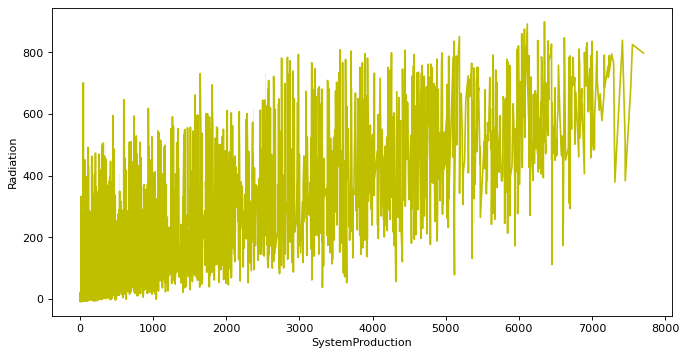

In [179]:
plt.figure(figsize=(10, 5), dpi=80)
sns.lineplot(x='SystemProduction', y='Radiation',color='y', data=data)
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


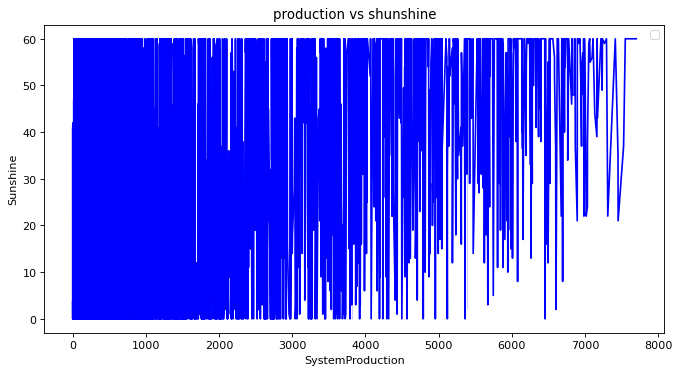

In [180]:
plt.figure(figsize=(10, 5), dpi=80)
sns.lineplot(x='SystemProduction', y='Sunshine',color='b', data=data)
plt.title('production vs shunshine')
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


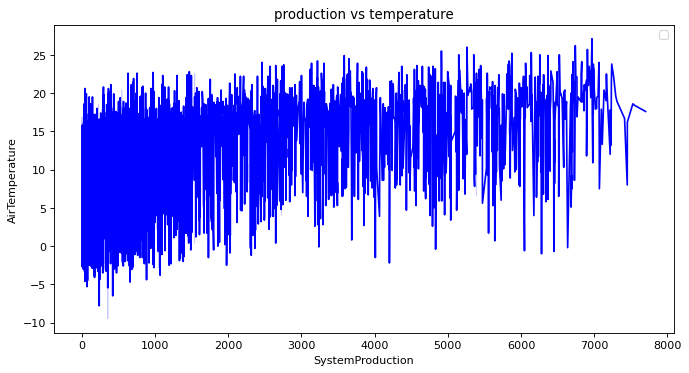

In [181]:
plt.figure(figsize=(10, 5), dpi=80)
sns.lineplot(x='SystemProduction', y='AirTemperature',color='b', data=data)
plt.title('production vs temperature')
plt.legend()
plt.show()

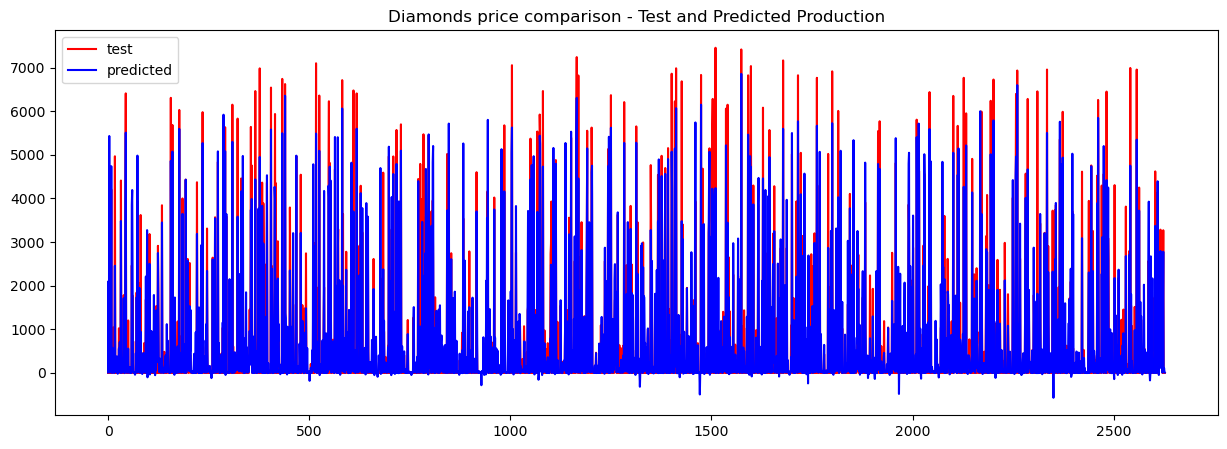

In [182]:
plt.figure(figsize=(15, 5))
GBR_ax = range(len(y_test))
plt.plot(GBR_ax, y_test,color='r', label="test")
plt.plot(GBR_ax, y_pred_GBR,color='b' ,label="predicted")
plt.title('Diamonds price comparison - Test and Predicted Production')
plt.legend()
plt.show()

In [183]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
model = Lasso()
# Define the hyperparameter grid
param_grid = {
    'alpha': [1e-3, 1e-2, 1e-1, 1, 10, 100, 1000],
    'max_iter': [100, 200, 300, 400, 500],
    'tol': [1e-3, 1e-4, 1e-5, 1e-6, 1e-7, 1e-8, 1e-9]
}

In [184]:
# Create a grid search object
grid_search = GridSearchCV(model, param_grid, cv=5)
# Fit the grid search object to the data
grid_search.fit(x, y)
# Print the best hyperparameters
print(grid_search.best_params_)

{'alpha': 1000, 'max_iter': 100, 'tol': 0.001}


In [185]:
from sklearn.linear_model import Ridge
# Fit a ridge regression model to the data
model = Ridge(alpha=1.0)
model.fit(x, y)
# Print the coefficients of the model
print(model.coef_)

[[ 7.82784182 -9.99755098 -5.61782147  6.48831104 11.37582268 -7.76942506
   0.         -1.85998803  1.54821044 14.52215424]]
